In [1]:
import pandas as pd
import utils

TS = 48


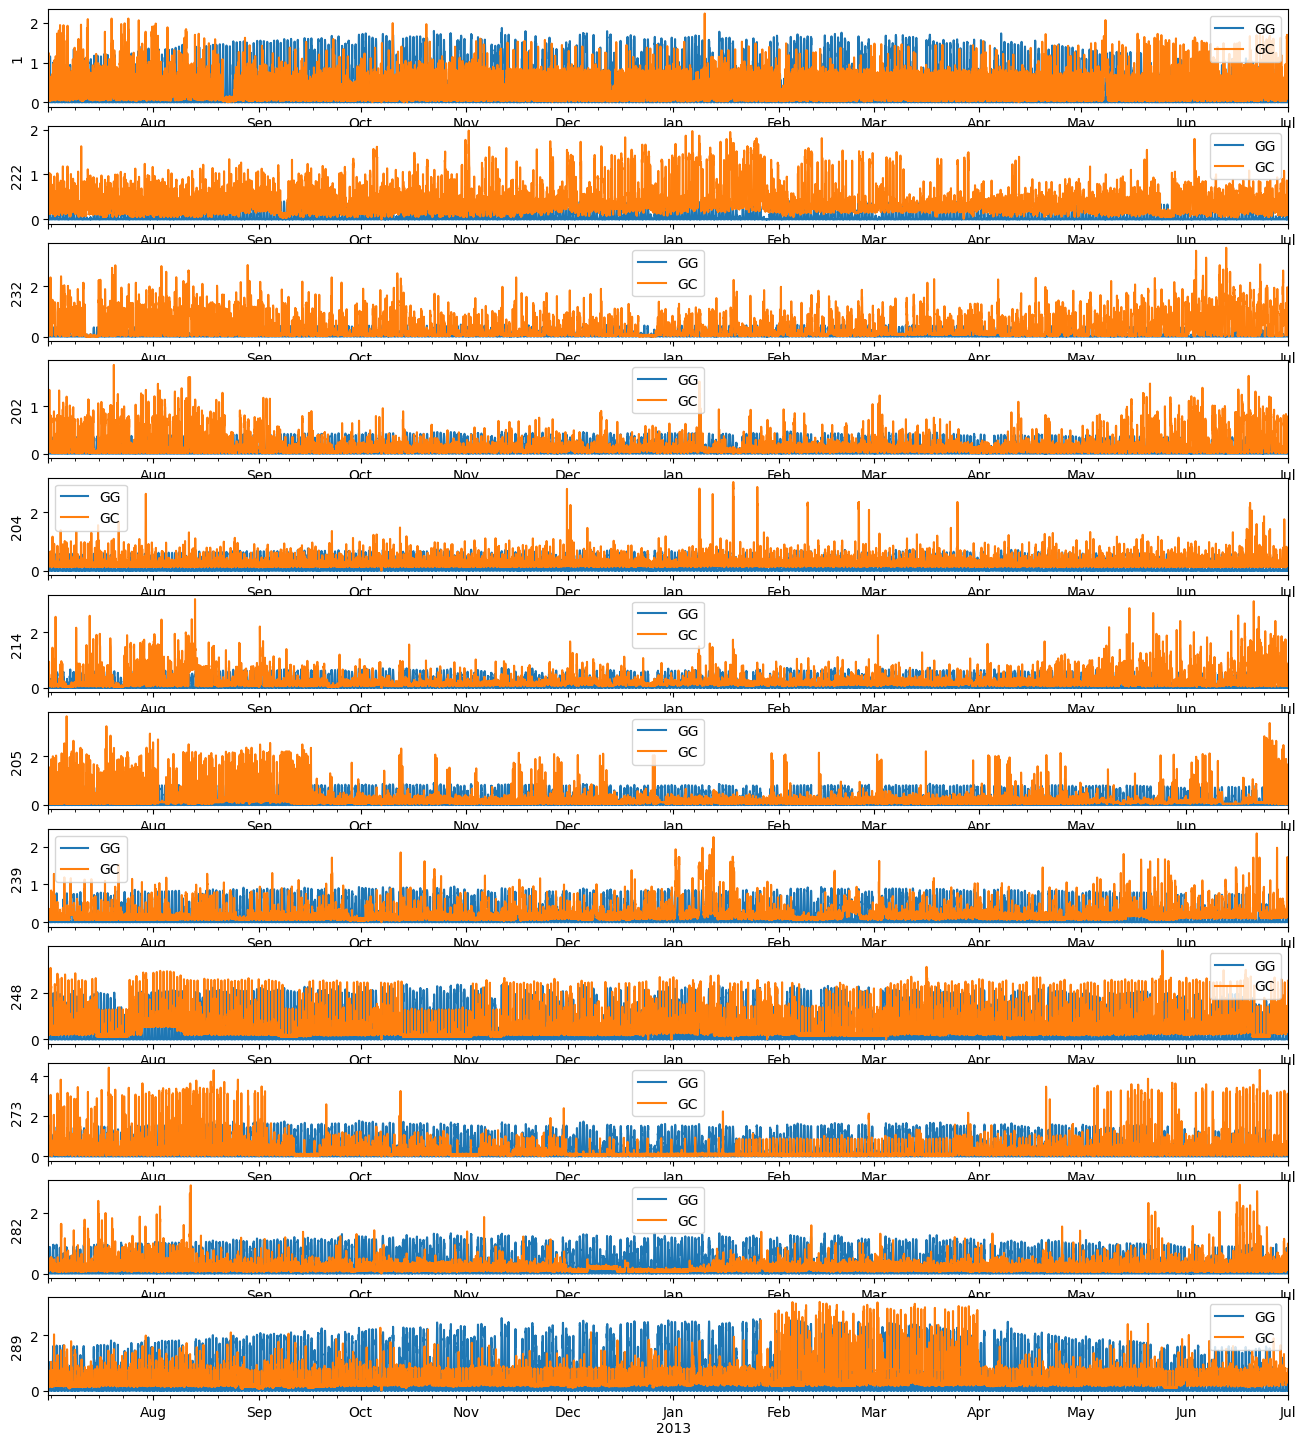

In [2]:
import matplotlib.pyplot as plt

samples = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
# samples = list(range(291, 301))
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', samples, TS)

fig, axes = plt.subplots(nrows=len(df_raw), ncols=1, figsize=(16,18))
for i, df in enumerate(df_raw):
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(samples[i]))
    

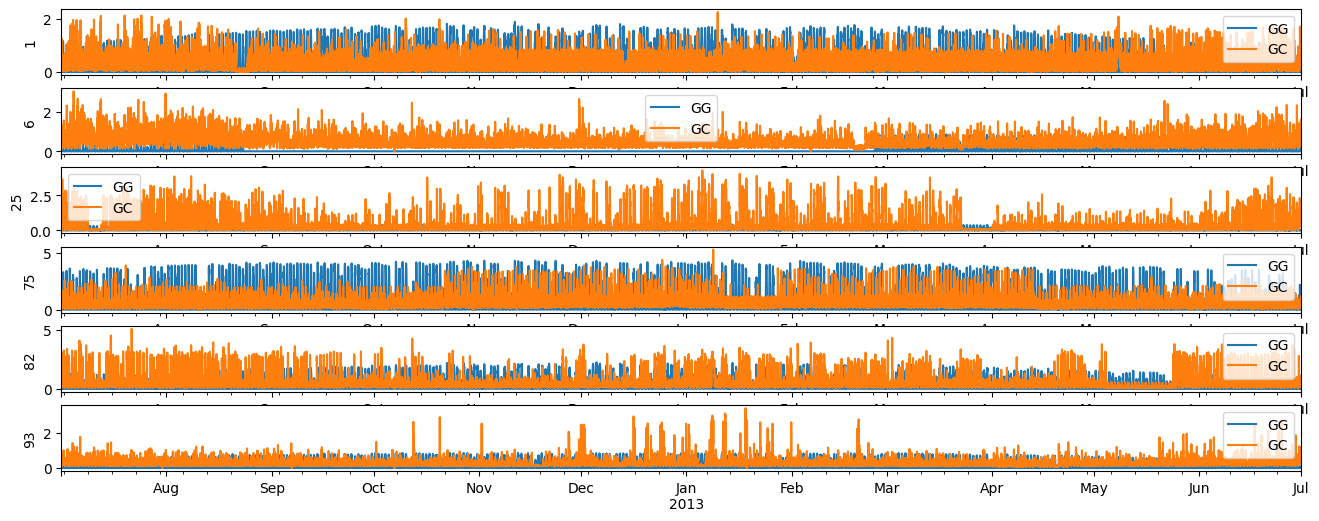

In [15]:
samples = [1, 6, 25, 75, 82, 93]
df_raw, df_date = utils.load_data('AusGrid_preprocess.csv', samples, TS)

df_sel = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, s in enumerate(selected):
    df = df_raw[samples.index(s)]
    df_sel.append(df)
    df.columns.name = None

    df[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))

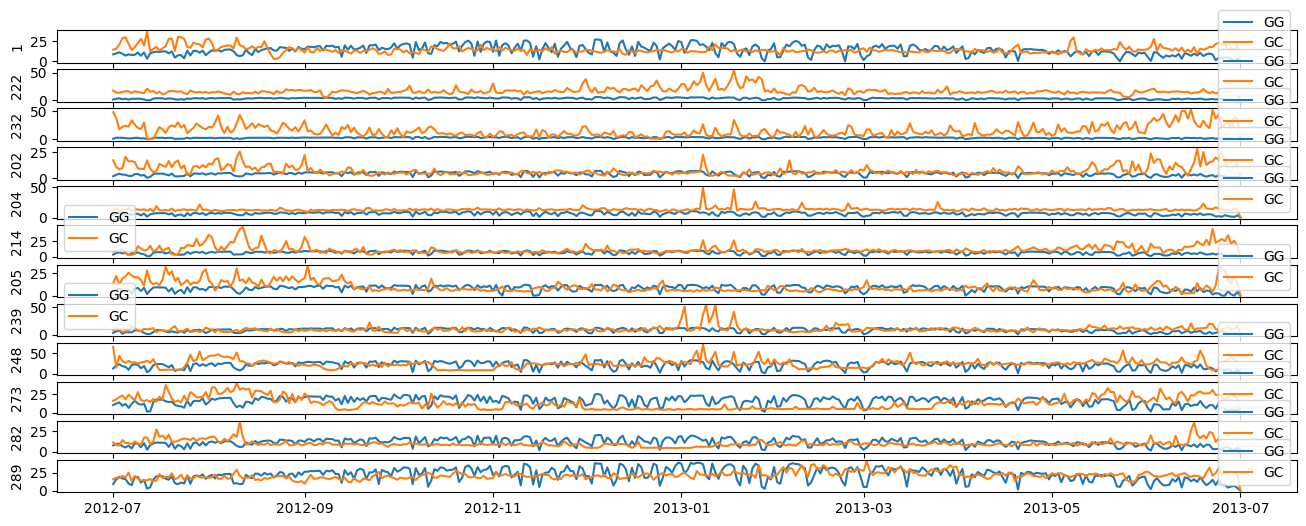

In [4]:
df_daily = []
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df1 = df.groupby(df.index.date).sum()
    df_daily.append(df1)
    df1[['GG', 'GC']].plot(ax=axes[i])
    axes[i].set_ylabel('{}'.format(s))
    

68.3% -0.5952415710287773
86.6% -0.8975620426162253
95.0% -1.1998825142036733
scss 0.24605846840606838 0.23838402510358192
68.3% 0.050519118097023974
86.6% -0.13392814363071975
95.0% -0.3183754053584635
scss 0.7076100107158907 0.09627164844643099
68.3% -0.31161166098254395
86.6% -0.6224214298299804
95.0% -0.9332311986774167
scss 0.623200695420299 0.12494980416263346
68.3% -1.509997957717916
86.6% -2.1947951957092937
95.0% -2.879592433700672
scss 0.2051902749255774 0.2577620340391802
68.3% -0.6137256386627169
86.6% -1.0299136292269522
95.0% -1.4461016197911873
scss 0.4762358210938259 0.29049299359633274
68.3% -0.21669114807615344
86.6% -0.3883227380959653
95.0% -0.5599543281157772
scss 0.5261533417856833 0.28266973067883916


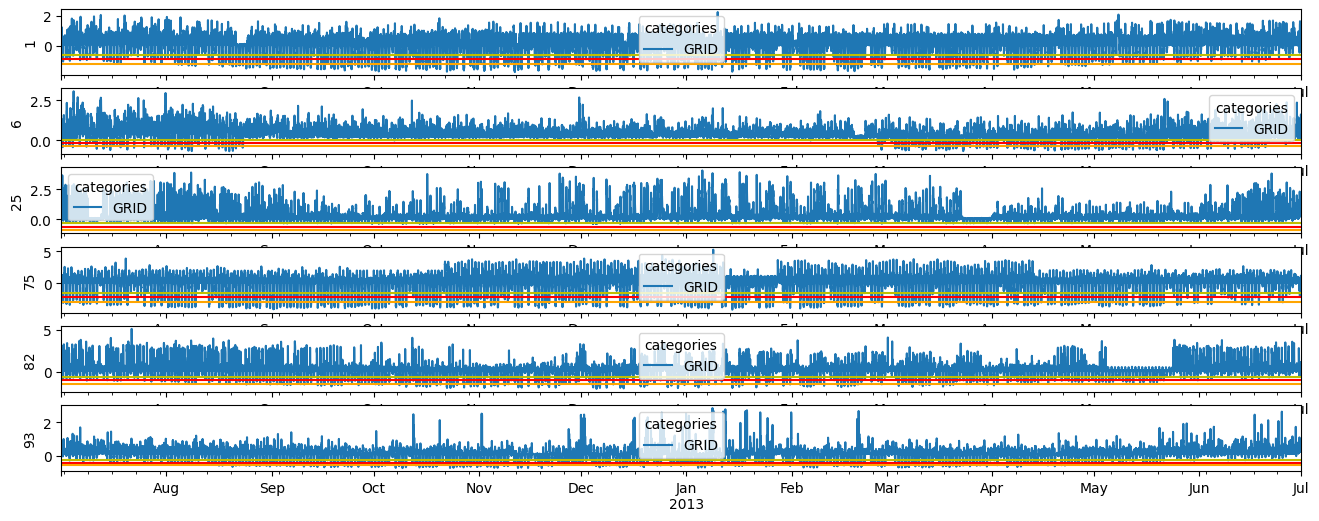

In [ ]:
import numpy as np

fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    df['GRID'] = df['GC'] - df['GG']
    df['PAT'] = np.where(df['GRID'] <= 0, 1, -1)
    
    gd_export = df[df['GRID']<0]['GRID'].sum()
    gd_import = df[df['GRID']>0]['GRID'].sum()
    df[['GRID']].plot(ax=axes[i])

    d_68 = df['GRID'].mean()-1.0*df['GRID'].std()
    d_86 = df['GRID'].mean()-1.5*df['GRID'].std()
    d_95 = df['GRID'].mean()-2.0*df['GRID'].std()
    print('68.3%', d_68)
    print('86.6%', d_86)
    print('95.0%', d_95)

    axes[i].axhline(d_68, color='y')
    axes[i].axhline(d_86, color='r')
    axes[i].axhline(d_95.mean(), color='orange')
    
    axes[i].set_ylabel('{}'.format(s))
    sc = 1 + gd_export/df['GG'].sum()
    ss = 1 - gd_import/df['GC'].sum()
    print('scss', sc, ss)
    

In [3]:
import numpy as np
    
def sim_ss_sc(pv, ld, c, cmin=0.10, cmax=0.95, cinit=0.10):
    soc_sts = c*cinit
    soc_max = c*cmax
    soc_min = c*cmin
    grid_imp = 0
    grid_exp = 0
    for p, l in zip(pv, ld):
        if p > l: # charging
            charge = min(soc_max - soc_sts, p - l)
            grid_exp += p - l - charge
        else: # discharging
            charge = -min(soc_sts - soc_min, l - p)
            grid_imp += l - p + charge
        soc_sts += charge

    return grid_imp, grid_exp


2 An exception occurred.


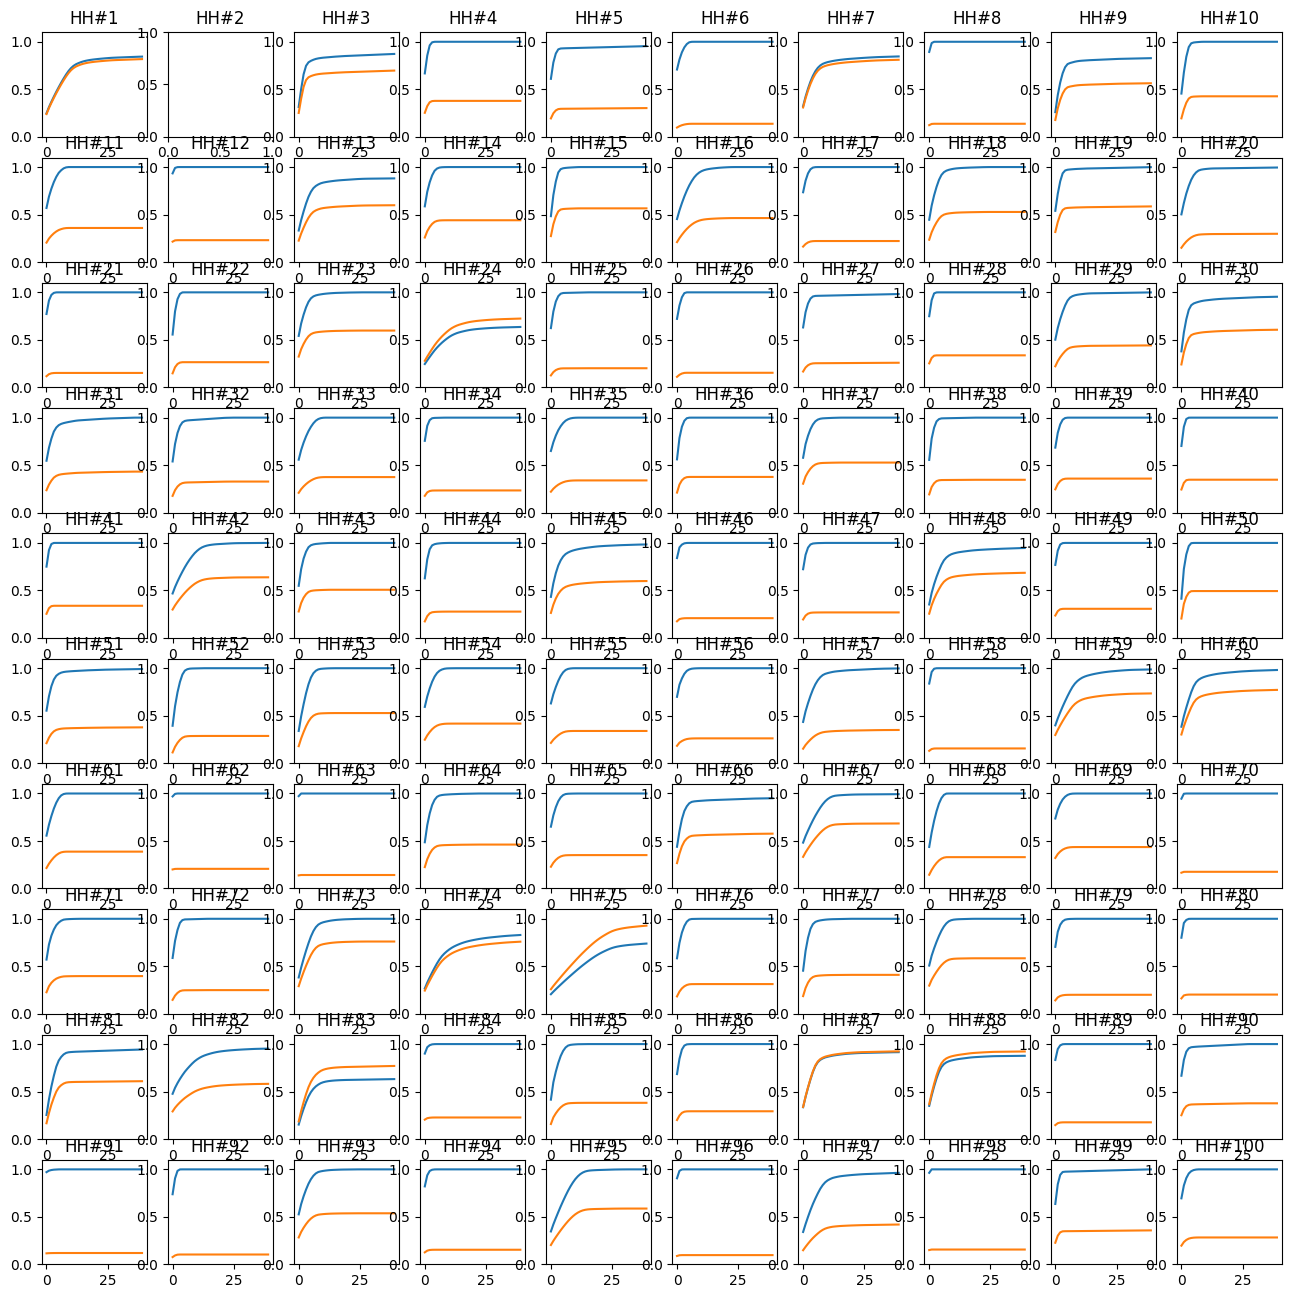

In [5]:
import pandas as pd
import utils
import matplotlib.pyplot as plt

selected = list(range(1, 101))
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(16,16))
for i, (s, df) in enumerate(zip(selected, df_sel)):
    try:
        sc_list = []
        ss_list = []
        for c in range(40):
            gimp, gexp = sim_ss_sc(df['GG'].values, df['GC'].values, c)
            sc = 1 - gexp/df['GG'].sum()
            ss = 1 - gimp/df['GC'].sum()
            sc_list.append(sc)
            ss_list.append(ss)
        axes[i//10, i%10].plot(sc_list, label='SC')
        axes[i//10, i%10].plot(ss_list, label='SS')
        # axes[i//10, i%10].set_xlabel('Capacity[kwh]')
        # axes[i//10, i%10].set_ylabel('SC and SS[%]')
        axes[i//10, i%10].set_title(f'HH#{s}', fontsize=8)
        # axes[i//10, i%10].legend()
        axes[i//10, i%10].set_ylim((0, 1.1))
    except:
        axes[i//10, i%10].set_title(f'HH#{s}', fontsize=8)

1 (10, 15, 20, 30)
25 (-2, 6, 13, 28)
75 (25, 33, 41, 58)
93 (1, 4, 8, 15)


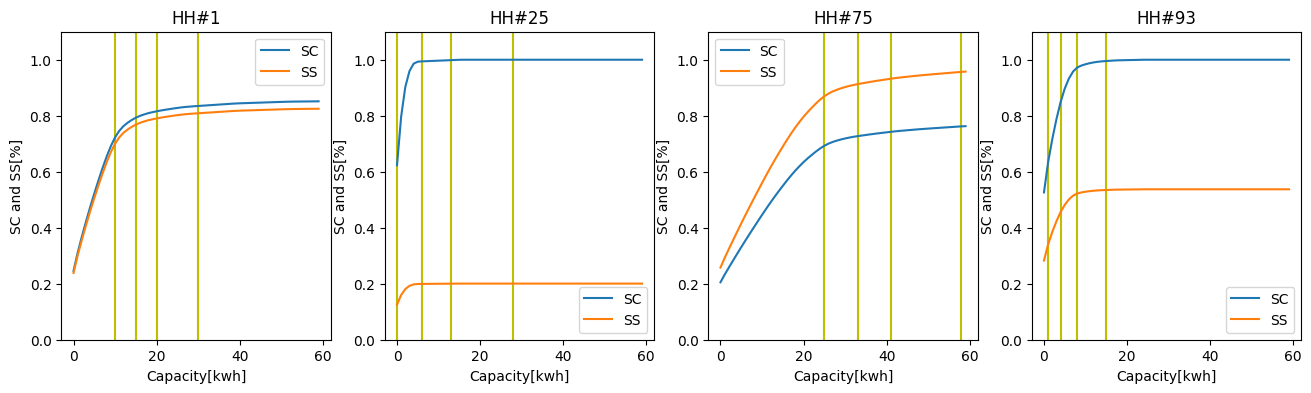

In [4]:
import matplotlib.pyplot as plt

selected = [1, 25, 75, 93]
# selected = [221, 243, 232, 202, 204, 214, 205, 239, 248, 273, 282, 289]
df_sel, df_date = utils.load_data('AusGrid_preprocess.csv', selected, TS)
ncols = 4
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(16,4))
if axes.ndim ==1:
    axes = np.reshape(axes, (-1, ncols))

for i, (s, df) in enumerate(zip(selected, df_sel)):
    sc_list = []
    ss_list = []

    stds = utils.cal_stds(df)
    print(s, stds)
    for p in stds:
        axes[i//ncols, i%ncols].axvline(max(0,p), color='y')

    for c in range(60):
        gimp, gexp = sim_ss_sc(df['GG'].values, df['GC'].values, c)
        sc = 1 - gexp/df['GG'].sum()
        ss = 1 - gimp/df['GC'].sum()
        sc_list.append(sc)
        ss_list.append(ss)
    axes[i//ncols, i%ncols].plot(sc_list, label='SC')
    axes[i//ncols, i%ncols].plot(ss_list, label='SS')
    axes[i//ncols, i%ncols].set_ylabel('SC and SS[%]')
    axes[i//ncols, i%ncols].set_title(f'HH#{s}')
    axes[i//ncols, i%ncols].legend()
    axes[i//ncols, i%ncols].set_ylim((0, 1.1))

    axes[-1, i%ncols].set_xlabel('Capacity[kwh]')


NameError: name 'df_daily' is not defined

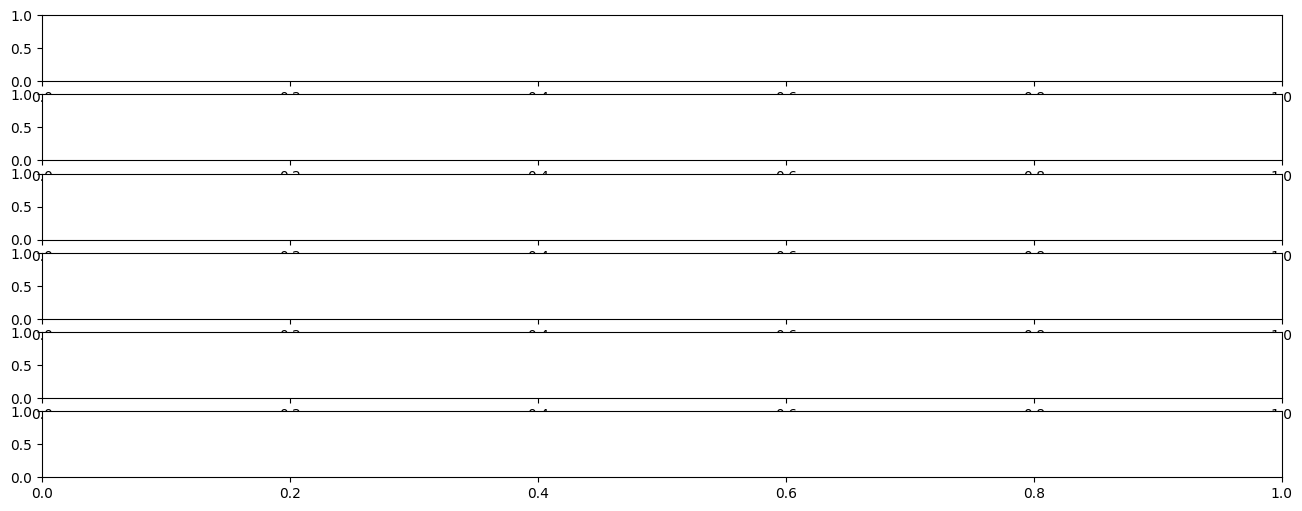

In [8]:
fig, axes = plt.subplots(nrows=len(selected), ncols=1, figsize=(16,6))
for i, (s, df) in enumerate(zip(selected, df_daily)):
    df['Diff'] = df['GG'] - df['GC']
    df['Diff'].plot(ax=axes[i])
    
    print('GG, GC, mean, std', df['GG'].mean(), df['GC'].mean(), df['Diff'].mean(), 1.5*df['Diff'].std())
    d_68 = df['Diff'].mean()+1.0*df['Diff'].std()
    d_86 = df['Diff'].mean()+1.5*df['Diff'].std()
    d_95 = df['Diff'].mean()+2.0*df['Diff'].std()
    print('68.3%', d_68)
    print('86.6%', d_86)
    print('95.0%', d_95)

    axes[i].axhline(d_68, color='y')
    axes[i].axhline(d_86, color='r')
    axes[i].axhline(d_95.mean(), color='orange')
    axes[i].set_ylabel('{}'.format(s))

    df['D86'] = df['Diff'] - d_86
    print(df[df['Diff']>0]['Diff'].sum(), df['GG'].sum())
